## OCR Assignment

In [1]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
IMAGE_PATH = 'D:\ML_workspace\IIT Bombay\img.jpg'

In [4]:
reader = easyocr.Reader(['en'], gpu= False)

Using CPU. Note: This module is much faster with a GPU.


In [12]:
reader_2 = easyocr.Reader(['hi'], gpu= False)

Using CPU. Note: This module is much faster with a GPU.


In [5]:
result = reader.readtext(IMAGE_PATH)
result

[([[261, 155], [582, 155], [582, 306], [261, 306]],
  'SURF',
  0.35677430033683777),
 ([[389, 290], [528, 290], [528, 332], [389, 332]],
  'TuRmVu20ectt',
  0.0009002964328184247)]

## Drawing Results 

In [7]:
top_left = tuple(result[0][0][0])
bottom_right = tuple(result[0][0][2])
text = result[0][1]
font = cv2.FONT_HERSHEY_SIMPLEX

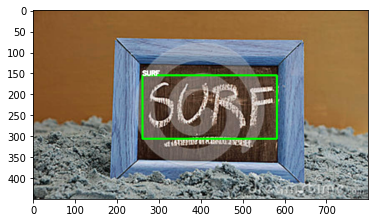

In [8]:
img = cv2.imread(IMAGE_PATH)
img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
img = cv2.putText(img,text,top_left, font, 0.5,(255,255,255),2,cv2.LINE_AA)
plt.imshow(img)

plt.show()

## Handling Multiple Lines

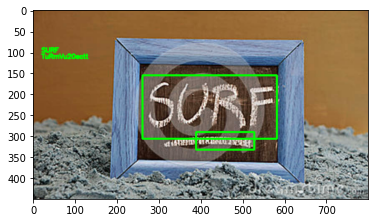

In [10]:
img = cv2.imread(IMAGE_PATH)
spacer = 100
for detection in result: 
    top_left = tuple(detection[0][0])
    bottom_right = tuple(detection[0][2])
    text = detection[1]
    img = cv2.rectangle(img,top_left,bottom_right,(0,255,0),3)
    img = cv2.putText(img,text,(20,spacer), font, 0.5,(0,255,0),2,cv2.LINE_AA)
    spacer+=15
    
plt.imshow(img)
plt.show()

In [ ]:
# import cv2
# import numpy as np
# from cv2 import boundingRect, countNonZero, cvtColor, drawContours, findContours, getStructuringElement, imread, morphologyEx, pyrDown, rectangle, threshold

# large = imread("D:\ML_workspace\IIT Bombay\page4.jpg")
# # downsample and use it for processing
# rgb = pyrDown(large)
# # apply grayscale
# small = cvtColor(rgb, cv2.COLOR_BGR2GRAY)

# # morphological gradient
# morph_kernel = getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# grad = morphologyEx(small, cv2.MORPH_GRADIENT, morph_kernel)

# # binarize
# _, bw = threshold(src=grad, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# morph_kernel = getStructuringElement(cv2.MORPH_RECT, (9, 1))

# # connect horizontally oriented regions
# connected = morphologyEx(bw, cv2.MORPH_CLOSE, morph_kernel)
# mask = np.zeros(bw.shape, np.uint8)

# # find contours
# contours, hierarchy = findContours(connected, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# # filter contours
# for idx in range(0, len(hierarchy[0])):
#     rect = x, y, rect_width, rect_height = boundingRect(contours[idx])
#     # fill the contour
#     mask = drawContours(mask, contours, idx, (255, 255, 2555), cv2.FILLED)
#     # ratio of non-zero pixels in the filled region
#     r = float(countNonZero(mask)) / (rect_width * rect_height)
#     if r > 0.45 and rect_height > 8 and rect_width > 8:
#         rgb = rectangle(rgb, (x, y+rect_height), (x+rect_width, y), (0,255,0),3)

# from PIL import Image
# Image.fromarray(rgb).show()